In [1]:
import time
import math
import numpy as np
from MDPGridWorld import *
from maxent_irl import *
from plotting import *

%load_ext autoreload
%autoreload 2

# Stochastic Dynamics
## Simulate Expert Demonstrations

In [2]:
book_grid = [[' ',' ',' ',+1],
            [' ','#',' ',-1],
            ['@',' ',' ',' ']]

np.random.seed(0)
gw = MDPGridWorld(book_grid, gamma=0.99, action_noise_dist=[0.2, 0.6, 0.2], living_reward=-0.04, obstacle_reward=-0.5)
trajectories = np.asarray(gw.sample_trajectories(1000, init_state_idx="random", max_length=15, avoid_obtacles=False), dtype=np.int)

# Linear MaxEnt

In [3]:
def terminal_state_potential_fn(s_idx, terminal_state_idx):
    
    if s_idx == terminal_state_idx:
        return 0
    else:
        return -1e20
phi=lambda x: terminal_state_potential_fn(x, gw.absorbing_state_idx)

In [4]:
# compute_feature_expectations(trajectories, gw.get_state_grid_features_matrix(), gw.gamma)
# svf = compute_state_visitation_frequency(trajectories, gw.nS, gw.nA, gw.T, gw.R, gw.gamma, phi, vi_eps=1e-3, silent=True)

In [4]:
start = time.time()
epochs, lr = 100, 1.
R = max_ent_irl(trajectories, gw.get_state_grid_features_matrix(), 
                gw.gamma, gw.nA, gw.T, 
                epochs, lr, 
                phi, vi_eps=1e-6, silent=False)
print("Epochs:{} Total Time: {} sec".format(epochs, time.time()-start))

 grad: [-0.7929, -0.369, 0.4706, 0.544, -0.9832, 0.0, 0.329, -0.1252, -1.3098, -0.5888, -0.349, -0.0338, 0.0]  sum|grad|:  5.895148994906241
 grad: [0.341, 0.0629, 0.0923, 0.3175, 0.5445, 0.0, 0.051, -0.3705, 0.3576, 0.2154, -0.4291, -0.4821, 0.0]  sum|grad|:  3.263882117072621
 grad: [0.0831, -0.1599, -0.0392, 0.2998, 0.3036, 0.0, 0.0833, -0.3069, 0.2289, 0.1938, -0.1925, -0.1127, 0.0]  sum|grad|:  2.003644107938486
 grad: [0.0061, -0.087, 0.0273, 0.3004, 0.0816, 0.0, 0.1145, -0.2698, 0.0209, 0.098, -0.1377, -0.0272, 0.0]  sum|grad|:  1.1703007056585115
 grad: [-0.0016, -0.0561, 0.0249, 0.2912, 0.0152, 0.0, 0.1024, -0.2487, -0.0472, 0.061, -0.1157, 0.0054, 0.0]  sum|grad|:  0.9693935813113538
 grad: [0.0088, -0.0411, 0.0027, 0.2765, 0.0208, 0.0, 0.0795, -0.2368, -0.0381, 0.057, -0.1059, 0.0176, 0.0]  sum|grad|:  0.8849254860288356
 grad: [0.0072, -0.0288, -0.008, 0.2658, 0.0137, 0.0, 0.0658, -0.2262, -0.0379, 0.0516, -0.0968, 0.0266, 0.0]  sum|grad|:  0.8285397215945897
 grad: [0.006,

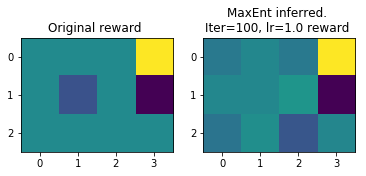

In [5]:
compare_grid_data(gw.R, R, gw.height, gw.width, suffix="reward ", title2="MaxEnt inferred. \nIter={}, lr={}".format(epochs, lr), grid=book_grid)

In [6]:
gw.disp_custom_grid(gw.R, formatting=lambda x: "{:.2f}".format(x))

-0.04	-0.04	-0.04	1.00	
-0.04	-0.50	-0.04	-1.00	
-0.04	-0.04	-0.04	-0.04	
Absorbing state: 0.00


In [7]:
gw.disp_custom_grid(R, formatting=lambda x: "{:.2f}".format(x))

-0.75	0.96	-0.69	16.05	
0.99	0.93	2.58	-12.07	
-1.21	1.81	-4.56	0.88	
Absorbing state: 0.00
